In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
df =pd.read_csv("Tele-communication Churn.csv")
df

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,2,AR,area_code_510,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,3,MO,area_code_415,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,4,OR,area_code_415,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,5,PA,area_code_408,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,99998,SD,area_code_510,61,no,28,no,6.4,12,1.48,79,16.03,234.4,145,30.62,234.8,19,12.80,3,no
99998,99999,WI,area_code_415,145,no,42,yes,17.8,18,2.56,13,8.58,191.4,99,18.29,86.5,83,4.32,1,yes
99999,100000,HI,area_code_415,167,yes,28,no,15.0,2,2.28,44,24.99,314.3,17,3.69,71.8,117,6.59,7,no
100000,100001,NC,area_code_408,194,no,2,yes,6.5,10,2.10,8,35.14,41.7,130,15.47,277.6,111,8.40,4,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      100002 non-null  int64  
 1   state           100002 non-null  object 
 2   area.code       100002 non-null  object 
 3   account.length  100002 non-null  int64  
 4   voice.plan      100002 non-null  object 
 5   voice.messages  100002 non-null  int64  
 6   intl.plan       100002 non-null  object 
 7   intl.mins       100002 non-null  float64
 8   intl.calls      100002 non-null  int64  
 9   intl.charge     100002 non-null  float64
 10  day.calls       100002 non-null  int64  
 11  day.charge      100002 non-null  float64
 12  eve.mins        100002 non-null  float64
 13  eve.calls       100002 non-null  int64  
 14  eve.charge      100002 non-null  float64
 15  night.mins      100002 non-null  float64
 16  night.calls     100002 non-null  int64  
 17  night.char

In [4]:
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,16,no,43,no,19.3,14,2.70,67,19.47,331.1,161,6.60,14.7,68,9.36,6,no
1,2,AR,area_code_510,29,yes,21,no,1.0,15,4.21,88,29.09,109.7,92,29.85,122.8,114,10.49,2,yes
2,3,MO,area_code_415,236,yes,44,yes,10.1,4,2.23,105,31.79,204.8,13,7.34,7.7,165,11.85,4,no
3,4,OR,area_code_415,134,yes,25,yes,19.2,18,3.73,136,26.69,78.2,84,16.27,52.1,66,12.03,8,no
4,5,PA,area_code_408,102,yes,15,yes,4.7,18,0.69,12,28.45,31.0,63,8.57,286.4,129,17.71,5,no


### Observations from the Dataset:
- 20 columns with a mix of categorical (state, area.code, voice.plan, intl.plan, churn) and numerical (account.length, intl.mins, day.calls, etc.).
- No missing values in any column.
- Redundant column: Unnamed: 0 (index-like, can be dropped).
- Target variable: churn (binary classification with "yes"/"no" values).
- Categorical features: state, area.code, voice.plan, intl.plan, churn.
- Potential feature engineering: Converting categorical variables to numerical, scaling, and handling class imbalance.

In [5]:
# Drop the redundant column 'Unnamed: 0'
df_cleaned = df.drop(columns=['Unnamed: 0'])

# Convert categorical variables to numerical format
df_cleaned['voice.plan'] = df_cleaned['voice.plan'].map({'yes': 1, 'no': 0})
df_cleaned['intl.plan'] = df_cleaned['intl.plan'].map({'yes': 1, 'no': 0})
df_cleaned['churn'] = df_cleaned['churn'].map({'yes': 1, 'no': 0})

# One-hot encoding for 'state' and 'area.code'
df_cleaned = pd.get_dummies(df_cleaned, columns=['state', 'area.code'], drop_first=True)

# Display cleaned dataset information
df_cleaned.info(), df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100002 entries, 0 to 100001
Data columns (total 69 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   account.length           100002 non-null  int64  
 1   voice.plan               100002 non-null  int64  
 2   voice.messages           100002 non-null  int64  
 3   intl.plan                100002 non-null  int64  
 4   intl.mins                100002 non-null  float64
 5   intl.calls               100002 non-null  int64  
 6   intl.charge              100002 non-null  float64
 7   day.calls                100002 non-null  int64  
 8   day.charge               100002 non-null  float64
 9   eve.mins                 100002 non-null  float64
 10  eve.calls                100002 non-null  int64  
 11  eve.charge               100002 non-null  float64
 12  night.mins               100002 non-null  float64
 13  night.calls              100002 non-null  int64  
 14  nigh

(None,
    account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
 0              16           0              43          0       19.3   
 1              29           1              21          0        1.0   
 2             236           1              44          1       10.1   
 3             134           1              25          1       19.2   
 4             102           1              15          1        4.7   
 
    intl.calls  intl.charge  day.calls  day.charge  eve.mins  ...  state_TX  \
 0          14         2.70         67       19.47     331.1  ...         0   
 1          15         4.21         88       29.09     109.7  ...         0   
 2           4         2.23        105       31.79     204.8  ...         0   
 3          18         3.73        136       26.69      78.2  ...         0   
 4          18         0.69         12       28.45      31.0  ...         0   
 
    state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  \
 0     

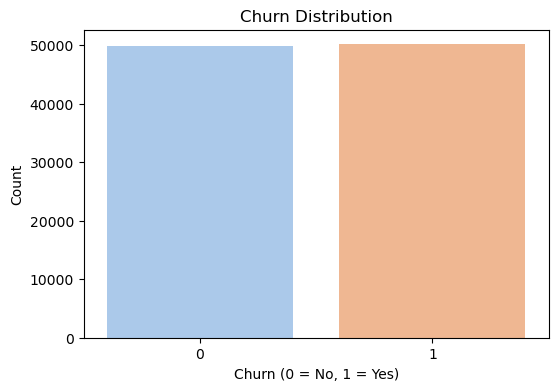

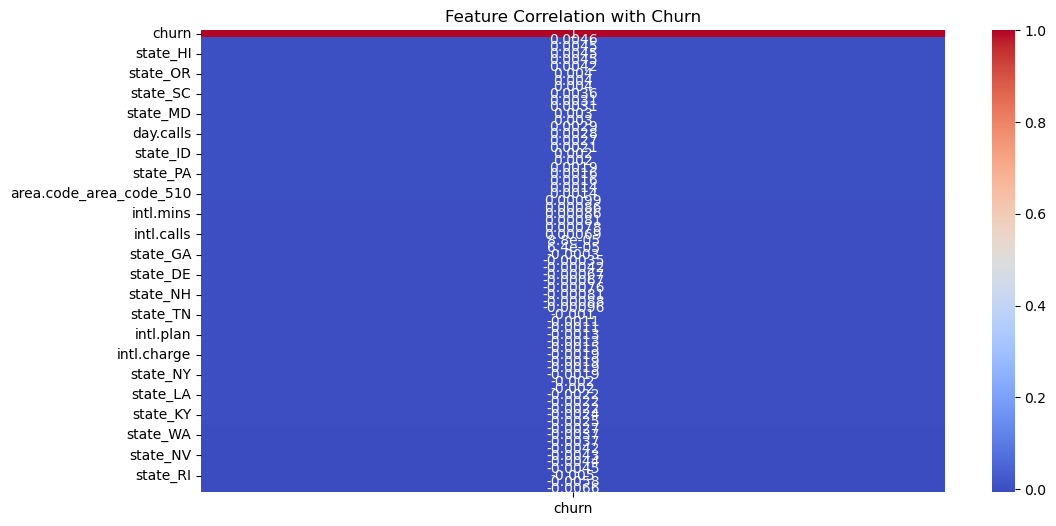

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned['churn'], palette="pastel")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap of top features
plt.figure(figsize=(12, 6))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix[['churn']].sort_values(by='churn', ascending=False), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Churn")
plt.show()

# STANDARDIZATION

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_cleaned.drop(columns=['churn'])
y = df_cleaned['churn']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output shape after preprocessing
X_train_scaled.shape, X_test_scaled.shape


((80001, 68), (20001, 68))

In [8]:
df_cleaned

,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,day.calls,day.charge,eve.mins,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area.code_area_code_415,area.code_area_code_510
0,16,0,43,0,19.3,14,2.70,67,19.47,331.1,...,0,0,0,0,0,0,0,0,1,0
1,29,1,21,0,1.0,15,4.21,88,29.09,109.7,...,0,0,0,0,0,0,0,0,0,1
2,236,1,44,1,10.1,4,2.23,105,31.79,204.8,...,0,0,0,0,0,0,0,0,1,0
3,134,1,25,1,19.2,18,3.73,136,26.69,78.2,...,0,0,0,0,0,0,0,0,1,0
4,102,1,15,1,4.7,18,0.69,12,28.45,31.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,61,0,28,0,6.4,12,1.48,79,16.03,234.4,...,0,0,0,0,0,0,0,0,0,1
99998,145,0,42,1,17.8,18,2.56,13,8.58,191.4,...,0,0,0,0,0,1,0,0,1,0
99999,167,1,28,0,15.0,2,2.28,44,24.99,314.3,...,0,0,0,0,0,0,0,0,1,0
100000,194,0,2,1,6.5,10,2.10,8,35.14,41.7,...,0,0,0,0,0,0,0,0,0,0


In [10]:
!pip install xgboost


# MODEL TRAINING AND EVALUATION

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize models with class weighting to handle imbalance
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb_clf = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=42)

# Train models
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
xgb_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluation metrics
log_report = classification_report(y_test, y_pred_log)
rf_report = classification_report(y_test, y_pred_rf)
xgb_report = classification_report(y_test, y_pred_xgb)

log_auc = roc_auc_score(y_test, y_pred_log)
rf_auc = roc_auc_score(y_test, y_pred_rf)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

log_report, log_auc, rf_report, rf_auc, xgb_report, xgb_auc


('              precision    recall  f1-score   support\n\n           0       0.50      0.53      0.52      9974\n           1       0.50      0.47      0.49     10027\n\n    accuracy                           0.50     20001\n   macro avg       0.50      0.50      0.50     20001\nweighted avg       0.50      0.50      0.50     20001\n',
 0.5017574015967995,
 '              precision    recall  f1-score   support\n\n           0       0.50      0.52      0.51      9974\n           1       0.50      0.49      0.49     10027\n\n    accuracy                           0.50     20001\n   macro avg       0.50      0.50      0.50     20001\nweighted avg       0.50      0.50      0.50     20001\n',
 0.5015651444728669,
 '              precision    recall  f1-score   support\n\n           0       0.49      0.49      0.49      9974\n           1       0.49      0.50      0.50     10027\n\n    accuracy                           0.49     20001\n   macro avg       0.49      0.49      0.49     20001\

In [12]:
# Train only Logistic Regression and Random Forest (excluding XGBoost)
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
xgb_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluation metrics
log_report = classification_report(y_test, y_pred_log)
rf_report = classification_report(y_test, y_pred_rf)
xgb_report = classification_report(y_test, y_pred_xgb)


log_auc = roc_auc_score(y_test, y_pred_log)
rf_auc = roc_auc_score(y_test, y_pred_rf)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

log_report, log_auc, rf_report, rf_auc, xgb_report, xgb_auc


('              precision    recall  f1-score   support\n\n           0       0.50      0.53      0.52      9974\n           1       0.50      0.47      0.49     10027\n\n    accuracy                           0.50     20001\n   macro avg       0.50      0.50      0.50     20001\nweighted avg       0.50      0.50      0.50     20001\n',
 0.5017574015967995,
 '              precision    recall  f1-score   support\n\n           0       0.50      0.52      0.51      9974\n           1       0.50      0.49      0.49     10027\n\n    accuracy                           0.50     20001\n   macro avg       0.50      0.50      0.50     20001\nweighted avg       0.50      0.50      0.50     20001\n',
 0.5015651444728669,
 '              precision    recall  f1-score   support\n\n           0       0.49      0.49      0.49      9974\n           1       0.49      0.50      0.50     10027\n\n    accuracy                           0.49     20001\n   macro avg       0.49      0.49      0.49     20001\

# MODEL TRAINING AND EVALUATION

In [12]:
# Re-initialize models
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
xgb_clf = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=42)



# Train models
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
xgb_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test_scaled)
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluation metrics
log_report = classification_report(y_test, y_pred_log)
rf_report = classification_report(y_test, y_pred_rf)
xgb_report = classification_report(y_test, y_pred_xgb)


log_auc = roc_auc_score(y_test, y_pred_log)
rf_auc = roc_auc_score(y_test, y_pred_rf)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

log_report, log_auc, rf_report, rf_auc, xgb_report, xgb_auc


('              precision    recall  f1-score   support\n\n           0       0.50      0.53      0.52      9974\n           1       0.50      0.47      0.49     10027\n\n    accuracy                           0.50     20001\n   macro avg       0.50      0.50      0.50     20001\nweighted avg       0.50      0.50      0.50     20001\n',
 0.5017574015967995,
 '              precision    recall  f1-score   support\n\n           0       0.50      0.52      0.51      9974\n           1       0.50      0.49      0.49     10027\n\n    accuracy                           0.50     20001\n   macro avg       0.50      0.50      0.50     20001\nweighted avg       0.50      0.50      0.50     20001\n',
 0.5015651444728669,
 '              precision    recall  f1-score   support\n\n           0       0.49      0.49      0.49      9974\n           1       0.49      0.50      0.50     10027\n\n    accuracy                           0.49     20001\n   macro avg       0.49      0.49      0.49     20001\

In [13]:
# Re-import necessary metrics
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate models
log_report = classification_report(y_test, y_pred_log)
rf_report = classification_report(y_test, y_pred_rf)
xgb_report = classification_report(y_test, y_pred_xgb)


log_auc = roc_auc_score(y_test, y_pred_log)
rf_auc = roc_auc_score(y_test, y_pred_rf)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)

log_report, log_auc, rf_report, rf_auc, xgb_report, xgb_auc


('              precision    recall  f1-score   support\n\n           0       0.50      0.53      0.52      9974\n           1       0.50      0.47      0.49     10027\n\n    accuracy                           0.50     20001\n   macro avg       0.50      0.50      0.50     20001\nweighted avg       0.50      0.50      0.50     20001\n',
 0.5017574015967995,
 '              precision    recall  f1-score   support\n\n           0       0.50      0.52      0.51      9974\n           1       0.50      0.49      0.49     10027\n\n    accuracy                           0.50     20001\n   macro avg       0.50      0.50      0.50     20001\nweighted avg       0.50      0.50      0.50     20001\n',
 0.5015651444728669,
 '              precision    recall  f1-score   support\n\n           0       0.49      0.49      0.49      9974\n           1       0.49      0.50      0.50     10027\n\n    accuracy                           0.49     20001\n   macro avg       0.49      0.49      0.49     20001\

# K fold cross validation

In [14]:

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
    print(f"Mean AUC for {model.__class__.__name__}: {scores.mean():.4f}")

# Evaluate models
evaluate_model(log_reg, X_train_scaled, y_train)
evaluate_model(rf_clf, X_train_scaled, y_train)
evaluate_model(xgb_clf, X_train_scaled, y_train)


Mean AUC for LogisticRegression: 0.4947
Mean AUC for RandomForestClassifier: 0.5002
Mean AUC for XGBClassifier: 0.4994


In [ ]:

from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search for each model
def perform_grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best AUC: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Perform tuning
best_log_reg = perform_grid_search(log_reg, param_grid_log)
best_rf_clf = perform_grid_search(rf_clf, param_grid_rf)
best_xgb_clf = perform_grid_search(xgb_clf, param_grid_xgb)

In [15]:
import joblib

# Assuming best_rf_clf is your chosen model from the hyperparameter tuning
model_filename = 'random_forest_model.pkl'

# Save the model
joblib.dump(best_rf_clf, model_filename)
print(f'Model saved to {model_filename}')

# To load the model later for inference
# loaded_model = joblib.load('random_forest_model.pkl')


NameError: name 'best_rf_clf' is not defined